# Exploratory Data Analysis of House Prices

In this dataset we will analyze sale price

In [1]:
#data analysis imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Let's import the train csv to a dataframe
df_train = pd.read_csv('data/house_prices_train.csv')

In [3]:
#Quick view of our data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here is a brief description of the columns in this [link](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1515809708&Signature=oTl8pi3APFccEqDCt1FjYsi1foJUHxcFss5f%2F1q4tiR%2BVpfomO1hwJun8UcA%2F71l7oVWaCORGJLOj2QAY8Mq2tEBqLtvc3mhtiMABdcLAkdWWNhUwMi%2F5%2BBVA9Ju0vhOFnc%2BHyFfhhrcJ%2BOhhWVp51GQS3HbXaRCqqeobF2E8FDnF9OqtRoorTIg3p1nQOYNUqKT89iLxoVx3uchVgEKDCLcqkoBzsPaD2QkOC71EHu4rtquh3daFUVPFzs6A5JqyYy8%2FiHEV2PAtcfeWSdBr3zUbcxBI0pmVTj2SoYfqPQ7bSzgbvCTEzLsqsoJBN9O%2BZESvLiZtamo%2Bex8s9rrqA%3D%3D).

In [4]:
#Let's go ahead and explore the Sale Price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that there are no zeros and that the data has no null values.

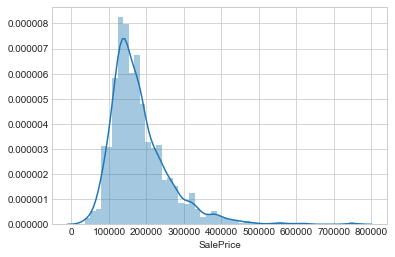

In [5]:
#Let's explore the skewness of the data
sns.distplot(df_train['SalePrice'])

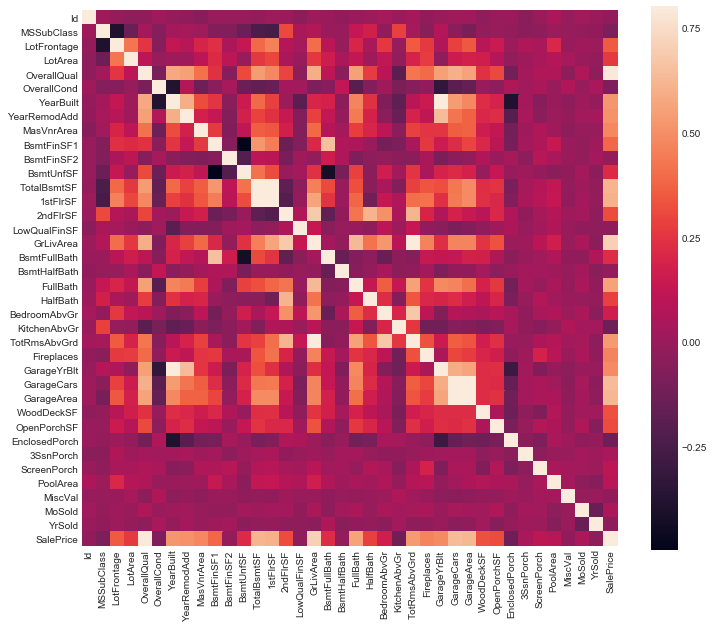

In [6]:
#Let's use a correlation map (heatmap) to view correlations at a glance

corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True)

Ligter reds indicate a positive correlation and darker reds indicate a negative correlation

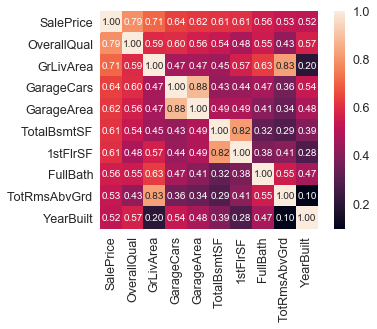

In [7]:
#Let's zoom in to get a better understanding of a few of the correlations and add some numbers to get clarification of colors

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

It seems that sale price has a positive correltion with overall quality, living area, garage cars, and garage area.

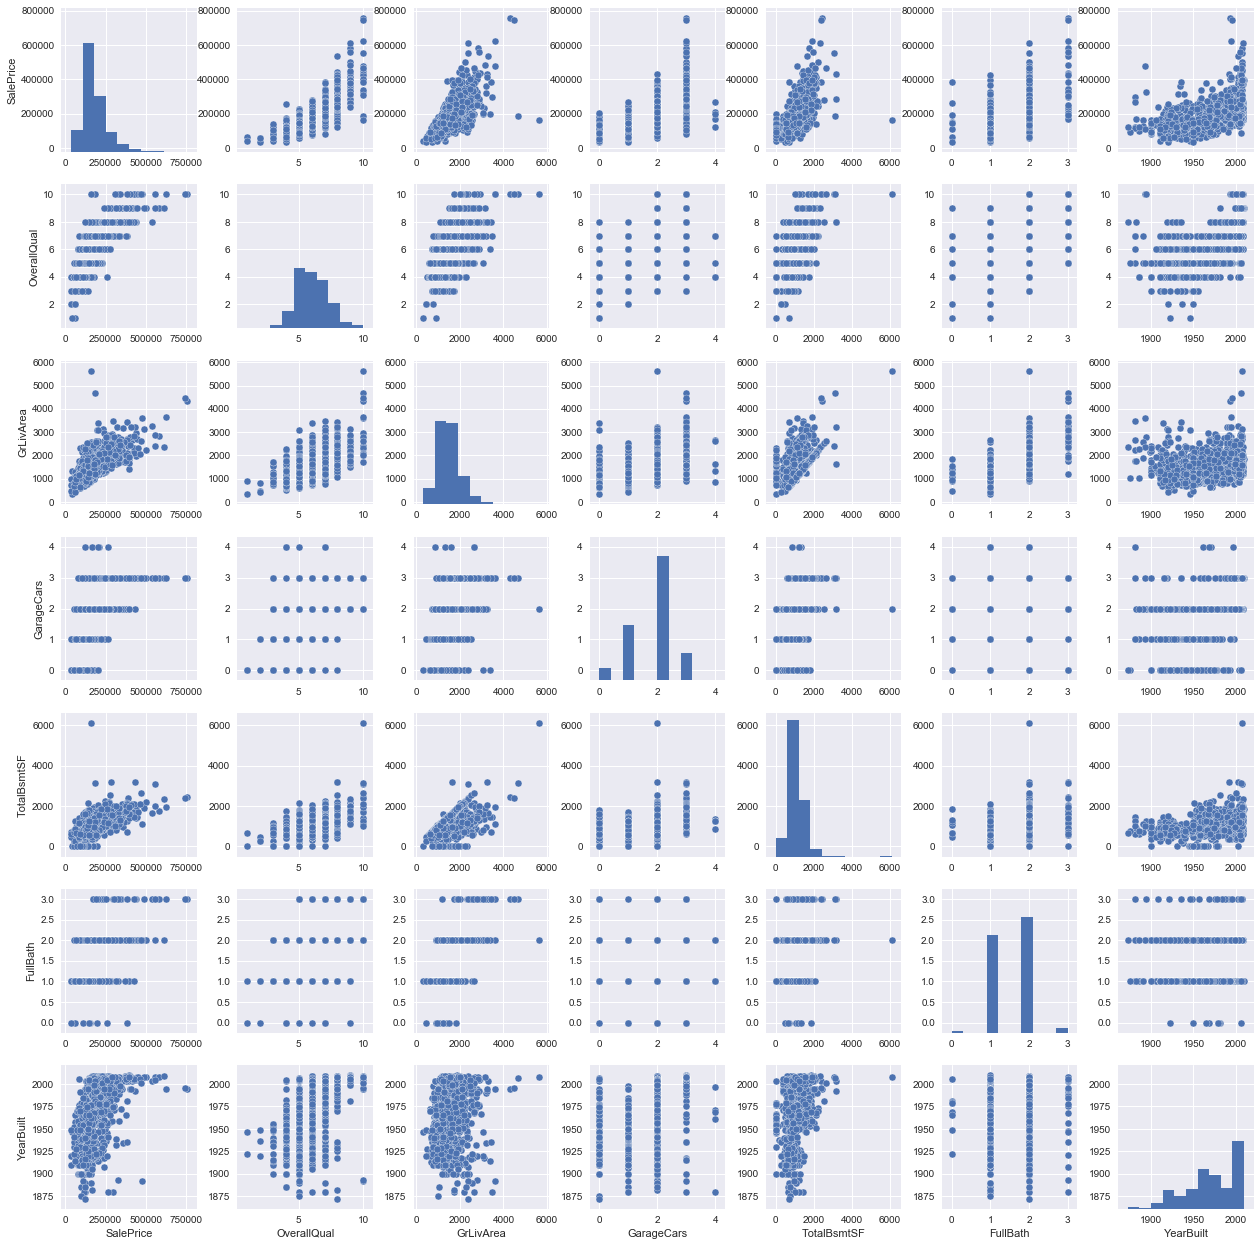

In [8]:
#Lets explore these correlations with sale price further
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

We can observe a lot of dot clouds, but the one that catches my eye is the correlation with sale price and year built. Seems like a small exponential trend.